In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
print(utmb_data.shape)
utmb_data.head()

(1786, 4)


,Entry,Entry name,rateconst,Gene names
0,Q9CQV8,1433B_MOUSE,0.309584,Ywhab
1,P62259,1433E_MOUSE,0.299214,Ywhae
2,P68510,1433F_MOUSE,0.379755,Ywhah
3,P61982,1433G_MOUSE,0.373152,Ywhag
4,P68254,1433T_MOUSE,0.557099,Ywhaq


In [3]:
Liver15N2H_GVB_Mouse=pd.read_csv("Liver.Proteins.Turnover.15N.and.2H.GVB_Mouse.csv",skiprows=1)[["Uniprot Gene Name","k0",'# Total Peptides']]
print(Liver15N2H_GVB_Mouse.shape)
Liver15N2H_GVB_Mouse.head()

(1329, 3)


,Uniprot Gene Name,k0,# Total Peptides
0,LPP60_MOUSE,0.805279,2
1,FGGY_MOUSE,0.126051,4
2,SPEB_MOUSE,0.123579,6
3,DHTK1_MOUSE,0.141873,40
4,TOM5_MOUSE,0.129240,1


In [4]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],right_on=["Entry name"])
print(utmb_Liver15N2H_GVB_Mouse.shape)
utmb_Liver15N2H_GVB_Mouse.head()

(1101, 7)


,Uniprot Gene Name,k0,# Total Peptides,Entry,Entry name,rateconst,Gene names
0,LPP60_MOUSE,0.805279,2,A0JNU3,LPP60_MOUSE,0.732540,Aspg
1,FGGY_MOUSE,0.126051,4,A2AJL3,FGGY_MOUSE,0.291233,Fggy
2,SPEB_MOUSE,0.123579,6,A2AS89,SPEB_MOUSE,0.134101,Agmat
3,DHTK1_MOUSE,0.141873,40,A2ATU0,DHTK1_MOUSE,0.251565,Dhtkd1 Kiaa1630
4,SC22B_MOUSE,0.202260,9,O08547,SC22B_MOUSE,0.294941,Sec22b Sec22l1


In [5]:
# corr= utmb_Liver15N2H_GVB_Mouse[['k0','rateconst']].corr()
# corr

## 1. No Filter

NameError: name 'temp' is not defined

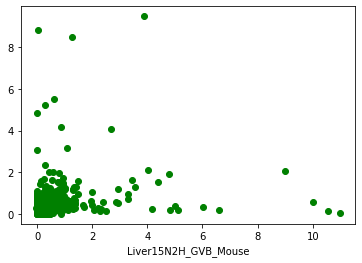

In [6]:
plt.scatter(utmb_Liver15N2H_GVB_Mouse.k0,utmb_Liver15N2H_GVB_Mouse.rateconst,c='g')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.ylabel("UTMB")

In [ ]:
temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<1.5)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
                                (utmb_Liver15N2H_GVB_Mouse.rateconst<1.5)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
plt.scatter(temp.k0,temp.rateconst,c='g')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

In [ ]:
# temp= temp[['k0','rateconst']].corr()
# corr

## 2. Total No. Peptides > 3

In [ ]:
temp=utmb_Liver15N2H_GVB_Mouse[utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>3]
print(temp.shape)
# temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<1.5)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
#                                 (utmb_Liver15N2H_GVB_Mouse.rateconst<1.5)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
plt.scatter(temp.k0,temp.rateconst,c='g') 
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

In [ ]:
temp=utmb_Liver15N2H_GVB_Mouse[utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>3]
print(temp.shape)
temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<1.5)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
                                (utmb_Liver15N2H_GVB_Mouse.rateconst<1.5)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
plt.scatter(temp.k0,temp.rateconst,c='g')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

In [ ]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],
                                                     right_on=["Entry name"],how='right')
print(utmb_Liver15N2H_GVB_Mouse.shape)
utmb_Liver15N2H_GVB_Mouse.head()

In [ ]:
nans=utmb_Liver15N2H_GVB_Mouse[ pd.isna(utmb_Liver15N2H_GVB_Mouse.k0)]
print(nans.shape)
nans.head(50)